In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("datasets/processed_data_with_stages.csv")

In [7]:
df.head()

,Timestamp,DAC,Phase Error,Temperature,Frequency Error
0,1655818048,32360.000000,-20.000000,33.404891,-0.000158
1,1655818108,32360.095238,-17.261905,33.363095,-0.000158
2,1655818168,32361.000000,-10.130435,33.394022,-0.000158
3,1655818228,32361.000000,-10.000000,33.407609,-0.000158
4,1655818288,32351.391304,-10.000000,33.418478,-0.000176


## Exploratory Data Analysis

In [8]:
df['DAC'].describe()

count     3316.000000
mean     32413.851394
std         53.063693
min      32153.000000
25%      32391.882197
50%      32415.000000
75%      32435.000000
max      32682.000000
Name: DAC, dtype: float64

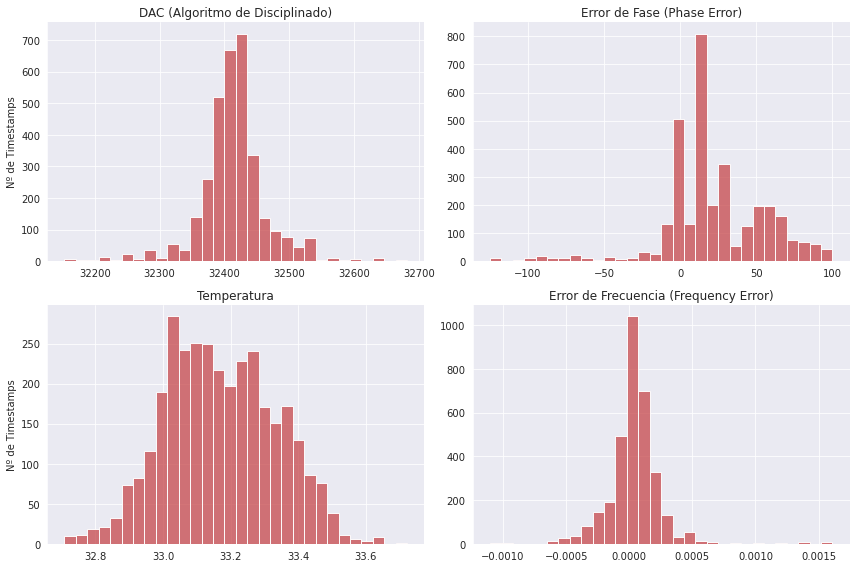

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.despine()

plt.title("DAC (Algoritmo de Disciplinado)")
sns.set_style("darkgrid")
sns.histplot(data=df,x="DAC",bins=30, color="#c6474b")
plt.xlabel('')
plt.ylabel("Nº de Timestamps")
sns.despine()

plt.subplot(2, 2, 2)

plt.title("Error de Fase (Phase Error)")
sns.set_style("darkgrid")
sns.histplot(data=df,x="Phase Error",bins=30, color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.subplot(2, 2, 3)

plt.title("Temperatura")
sns.set_style("darkgrid")
sns.histplot(data=df,x="Temperature",bins=30, color="#c6474b")
plt.xlabel('')
plt.ylabel("Nº de Timestamps")
sns.despine()

plt.subplot(2, 2, 4)

plt.title("Error de Frecuencia (Frequency Error)")
sns.set_style("darkgrid")
sns.histplot(data=df,x="Frequency Error",bins=30, color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.tight_layout()

#plt.savefig("fotos/eda_4variables_juntas.png")

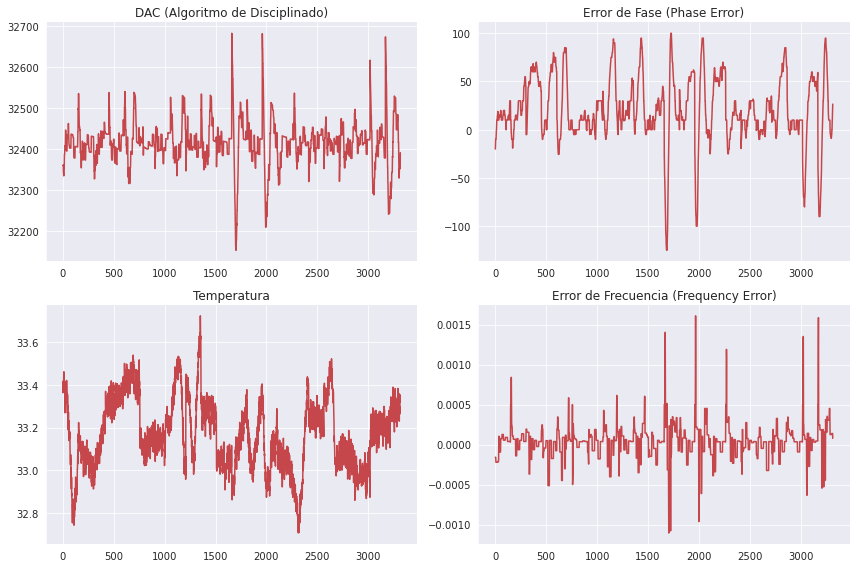

In [10]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)

plt.title("DAC (Algoritmo de Disciplinado)")
sns.set_style("darkgrid")
sns.lineplot(data=df["DAC"], color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.subplot(2, 2, 2)

plt.title("Error de Fase (Phase Error)")
sns.set_style("darkgrid")
sns.lineplot(data=df["Phase Error"], color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.subplot(2, 2, 3)

plt.title("Temperatura")
sns.set_style("darkgrid")
sns.lineplot(data=df["Temperature"], color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.subplot(2, 2, 4)

plt.title("Error de Frecuencia (Frequency Error)")
sns.set_style("darkgrid")
sns.lineplot(data=df["Frequency Error"], color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()

plt.tight_layout()

#plt.savefig("fotos/eda_4variables_juntas_through_time.png")

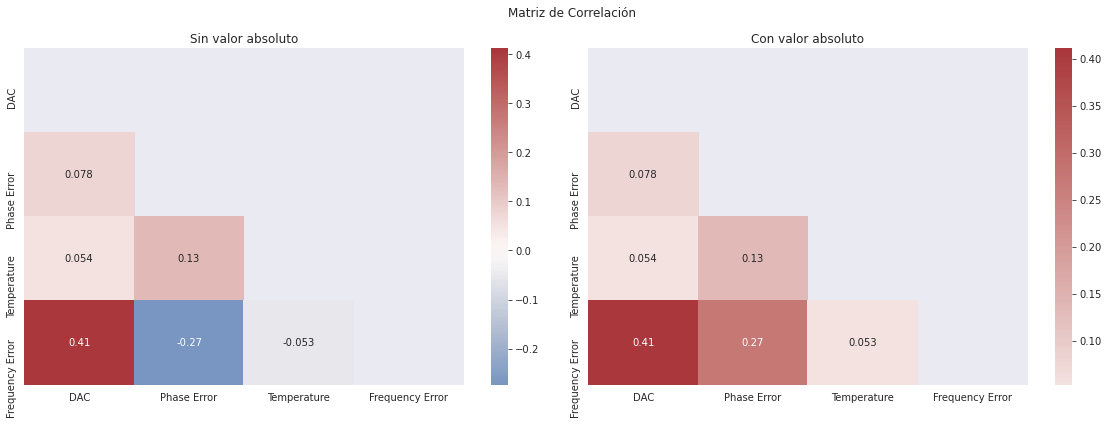

In [11]:
#corr= data.select_dtypes(['int','float']).corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.drop("Timestamp",axis=1).corr())

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
sns.set_style("darkgrid")
fig.suptitle("Matriz de Correlación")
# Heatmap without absolute values
sns.heatmap(df.drop("Timestamp",axis=1).corr(), annot=True,mask=matrix, center = 0, cmap = 'vlag', ax = axes[0]).set_title('Sin valor absoluto')
# Heatmap with absolute values
sns.heatmap(abs(df.drop("Timestamp",axis=1).corr()), annot=True,mask=matrix, center = 0, cmap = 'vlag', ax = axes[1]).set_title('Con valor absoluto')

fig.tight_layout()
#fig.savefig("./fotos/eda_var_correlation.png")

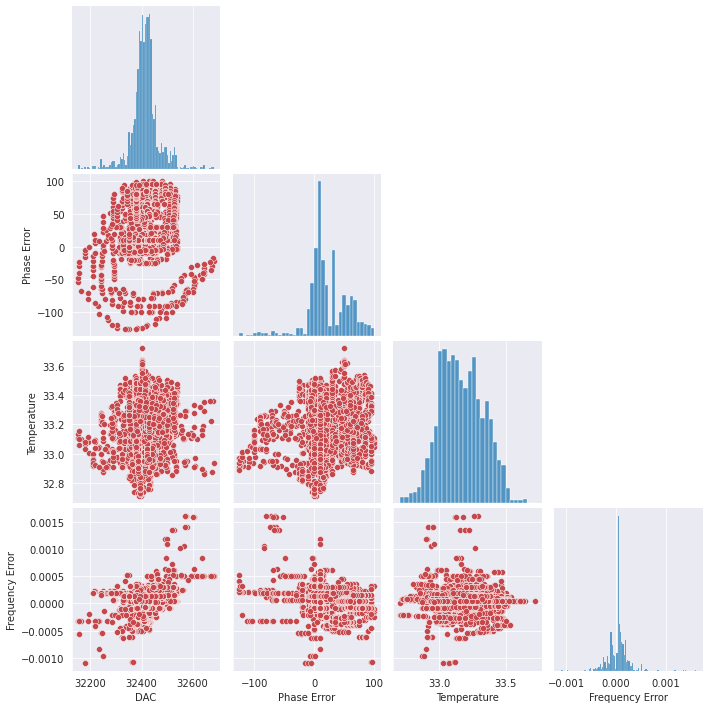

In [12]:
sns.set_style("darkgrid")
g=sns.pairplot(df.drop("Timestamp",axis=1),corner=True)
g.map_lower(sns.scatterplot,color='#c6474b')
g.map_diag(plt.hist)
#plt.savefig("./fotos/eda_relaciones_atributos.png")

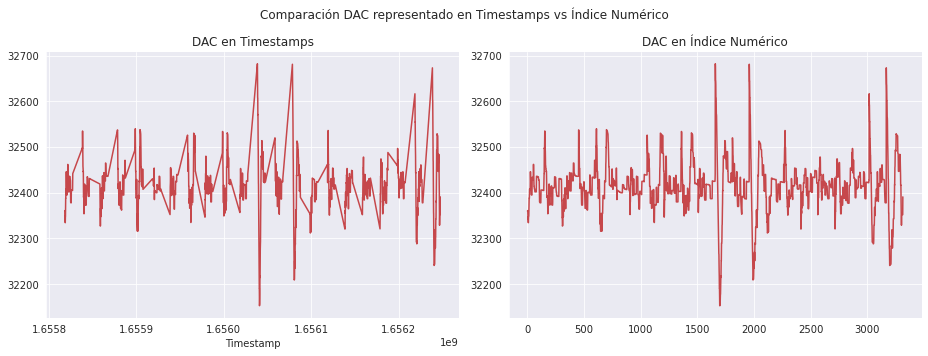

In [13]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)

plt.title("DAC en Timestamps")
sns.set_style("darkgrid")
sns.lineplot(data=pd.Series(df['DAC'].values,index=df['Timestamp'].values), color="#c6474b")
plt.xlabel('Timestamp')
#lt.ylabel("Nº de Timestamps")
sns.despine()

plt.subplot(1, 2, 2)

plt.title("DAC en Índice Numérico")
sns.set_style("darkgrid")
sns.lineplot(data=df["DAC"].values, color="#c6474b")
plt.xlabel('')
plt.ylabel("")
sns.despine()
plt.suptitle("Comparación DAC representado en Timestamps vs Índice Numérico")

plt.tight_layout()
#plt.savefig("./fotos/eda_dac_timestamp_vs_indice.png")